**this is a template notebook. To get a 60 you will need to complete the first three chapters. From there is additional points. In the template you'll see text between <> so \<example> where you will have to isert your own text. 
    The template is also just an indication. You can add more cells if needed, and can of course delete this line**

# INSERT
## DMS - Regression Assignment (v1.1)
Author: Ruben Schild <br>
Student number: 650580 <br>
Date: 13-5-2022

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* \<add other packages\>

From these we will need the following libraries:

In [3]:
# pandas as pd
try:
    import pandas as pd
    print('Pandas already installed, only imported')
except:
    %pip install pandas
    import pandas as pd
    print('Pandas was not installed, installed and imported')
    
# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    %pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
    
# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    %pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')    

# sns

try: 
    import seaborn as sns
    print('seaborn already installed, only imported')
except:
    !pip install seaborn
    print('seaborn was not installed, installed and imported')

try:
    import statsmodels.api as sm
    print('statsmodels already installed, only imported')

except:
    !pip install statsmodels
    print('statsmodels was not installed, installed and imported')

# sklearn
try:
    from sklearn.linear_model import LinearRegression
    print('sklearn already installed, only imported')
except:
    !pip install sklearn
    from sklearn.linear_model import LinearRegression
    print('sklearn was not installed, installed and imported')

from sklearn import metrics

try:
    import eli5
    print('eli5 already installed, only imported')
except:
    %pip install eli5
    import eli5
    print('eli5 was not installed, installed and imported')

from eli5.sklearn import PermutationImportance


Pandas already installed, only imported
NumPy already installed, only imported
PyPlot already installed, only imported
seaborn already installed, only imported
statsmodels already installed, only imported
sklearn already installed, only imported
eli5 already installed, only imported


# 1. The Data
We are going to use the datafile carprice_prediction.csv. This contains data from A Chinese automobile company Geely Auto. They want to enter the American market. To do so, they wanted to know what factors are important for the price prediction of the cars, and how well these factors describe the price of the cars.

In [4]:
# enter the code to load the data
df_cprice_prediction = pd.read_csv('data/carprice_prediction.csv')

In [5]:
df_cprice_prediction.dropna()
df_cprice_prediction.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Here's a quick look at the data:

In [6]:
# enter the code to see the first few rows of the data
df_cprice_prediction.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<span style='background:yellow'><explain the variables (/fields/columns) you are going to use for your prediction. The dependent y (the one you are going to predict) and **two** x's (the ones you are going to use to predict that y). What do these variables mean?></span>

*note:* You can score a +.5 point if you don't just pick randomly your variables, but use either a pairplot (a plot showing all scatterplots between all possible pairs of variables), a heatmap, and/or a correlation matrix, to pick some that at least have a reasonable correlation.

I am going to use the price of the car as the dependent y. And the two x's I am going to use are the engine size and the horsepower

<AxesSubplot:>

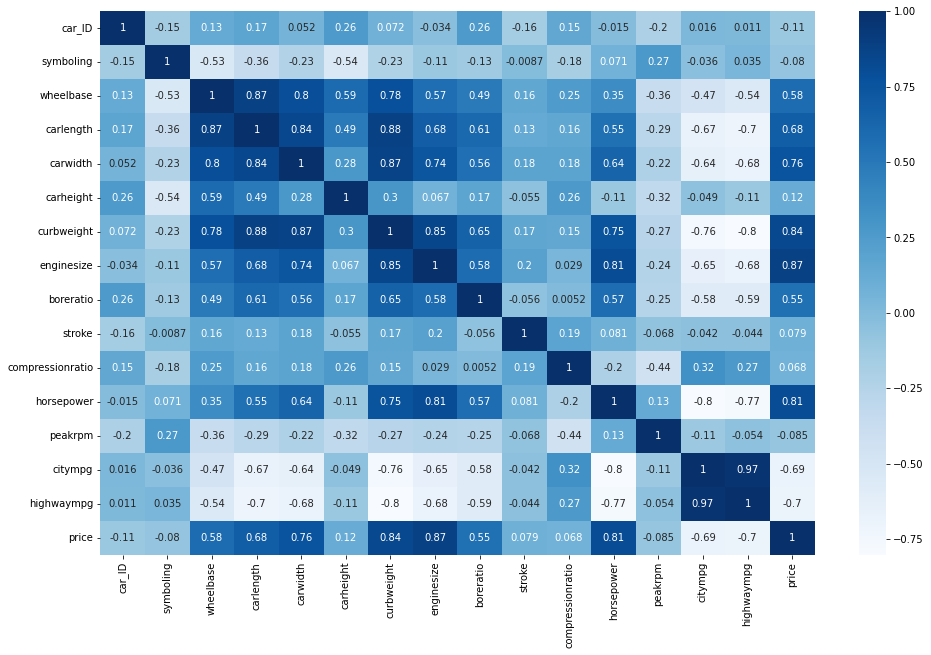

In [7]:
# I am going to use the price of the car as the dependent y. And the two x's I am going to use are the engine size and the horsepower
plt.rcParams['figure.figsize'] = (16,10)
cor=df_cprice_prediction.corr()
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True, cmap="Blues")

# 2. The Bivariate Regression

## 2.1. The First Bivariate Regression

First we are going to look at the predictions using only one of our two x's. 

We start with predicting the price (y) using the size of the engine. Below a visualisation of these two:

In [8]:
df_pe = df_cprice_prediction[['price', 'enginesize']]
df_pe.head()

,price,enginesize
0,13495.0,130
1,16500.0,130
2,16500.0,152
3,13950.0,109
4,17450.0,136


In [9]:
# The data is cleaned earlier, but I wanted to be sure if it stayed cleaned
df_pe.isna().sum()

price         0
enginesize    0
dtype: int64

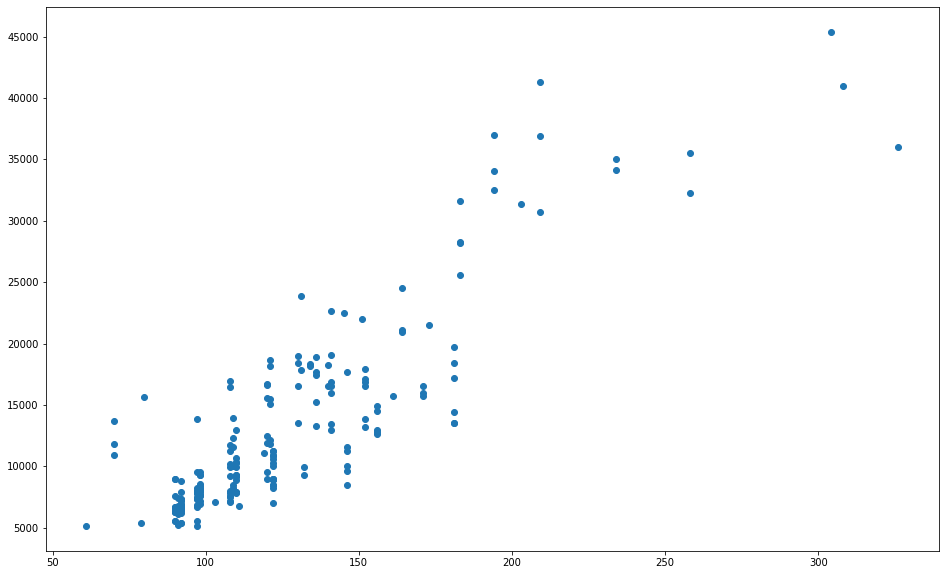

In [10]:
# enter code to show scatterplot
# y = price
# x1 = enginesize
# x2 = horsepower
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = df_cprice_prediction['enginesize']
y = df_cprice_prediction['price']

plt.scatter(x,y)
plt.show()


As can be seen from the scatterplot there seems to be a clear correlation between the engine size and the price of the car

Now that we have a visual inspection its time to perform a bivariate regression (twice, once for each x variable). 

We first split the data into training and testing data. We start again with the x of engine size:

In [11]:
# add code to create training and testing data

# Convert to np array
df_arr = df_cprice_prediction.values

x = df_arr[0:,16]
y = df_arr[0:,25]

x_res = x.reshape((-1,1))
y_res = y.reshape((-1,1))

x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.4, random_state=101)



Now setup the linear regression model and fit our training data:

In [12]:
# add code to create linear regression model
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)

Lets see how well the model performed with the training data, by visualisation:

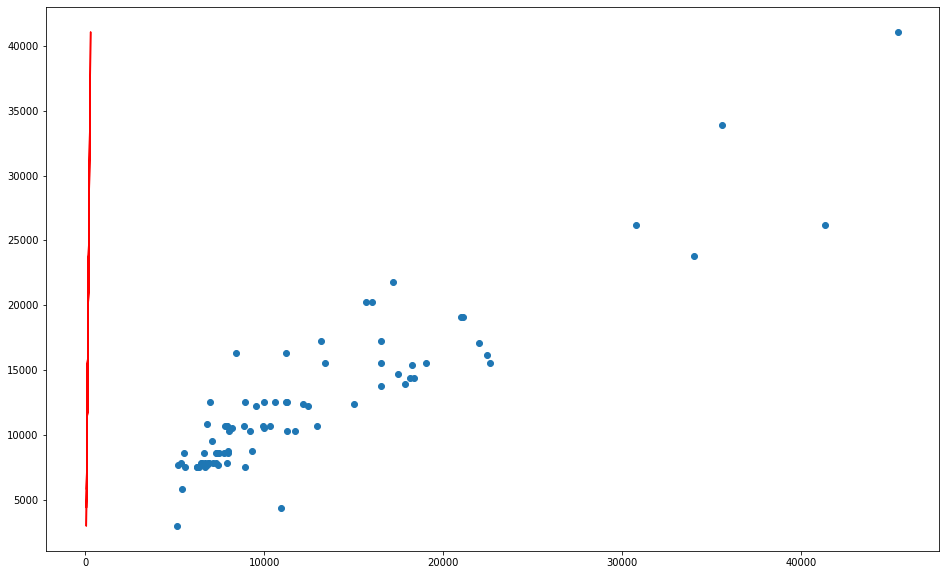

In [13]:
# add code to show scatterplot with the regression line
plt.scatter(y_test, y_pred)
plt.plot(x_test, y_pred, color='red')
plt.show()


<span style='background:yellow'>\<describe how well the line describes the data></span> <br>
The line does not describe the data well. As you can see, it goes up very straight. Maybe this has something to do with the fact that we use y_test as the x line.

Besides from a visual, we can also use some metrics.

In [14]:
# code to show the results of the statsmodels.api summary
x_train = sm.add_constant(x_train)
my_model = sm.OLS(y_train.astype(float), x_train.astype(float)).fit()
my_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     314.4
Date:                Tue, 17 May 2022   Prob (F-statistic):           1.93e-35
Time:                        13:51:12   Log-Likelihood:                -1199.4
No. Observations:                 123   AIC:                             2403.
Df Residuals:                     121   BIC:                             2408.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6571.7161   1214.715     -5.410      0.000   -8976.565   -4166.867
x1           156.7266      8.839     17.731      0.000     139.227     174.226
==============================================================================
Omnibus:                       12.219   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.757
Skew:                           0.744   Prob(JB):                      0.00170
Kurtosis:                       3.527   Cond. No.                         442.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='background:yellow'>\<explain in your own words what the R-squared means and indicates, and the two numbers in the column of coef></span>

R-squared is the coefficient of determination. Unlike the correlation coefficient, R-squared represents a value that is between 0 and 1 because you take the square of correlation coefficient. It indicates how good the fit is of the observations. <br>
The 'const' row is the intercept, it intersects with the vertical axis, also known as b0. And the second one is the slope or gradient, b1.

We can also check how well our model worked by using the testing data:

In [15]:
# code to show the accuracy score
model.score(x_test, y_test)

0.8117084750294413

<span style='background:yellow'>\<explain in your own words what this number means></span>

This number is the coefficient of determination, also known as R-Squared. It basically means how accurate our prediction was. In our case, the test data is pretty accurate


Now we repeat all these steps, but using the other x-variable: horsepower.

## 2.2. The Second Bivariate Regression

In this section we are going to repeat all the steps from the previous one, but now we are going to try to predict the price (y). based on the horsepower of the car

Below a visualisation of these two:

In [16]:
df_ph = df_cprice_prediction[['price', 'horsepower']]
df_ph.head()


,price,horsepower
0,13495.0,111
1,16500.0,111
2,16500.0,154
3,13950.0,102
4,17450.0,115


In [17]:
# The data is cleaned earlier, but I wanted to be sure if it stayed cleaned
df_ph.isna().sum()


price         0
horsepower    0
dtype: int64

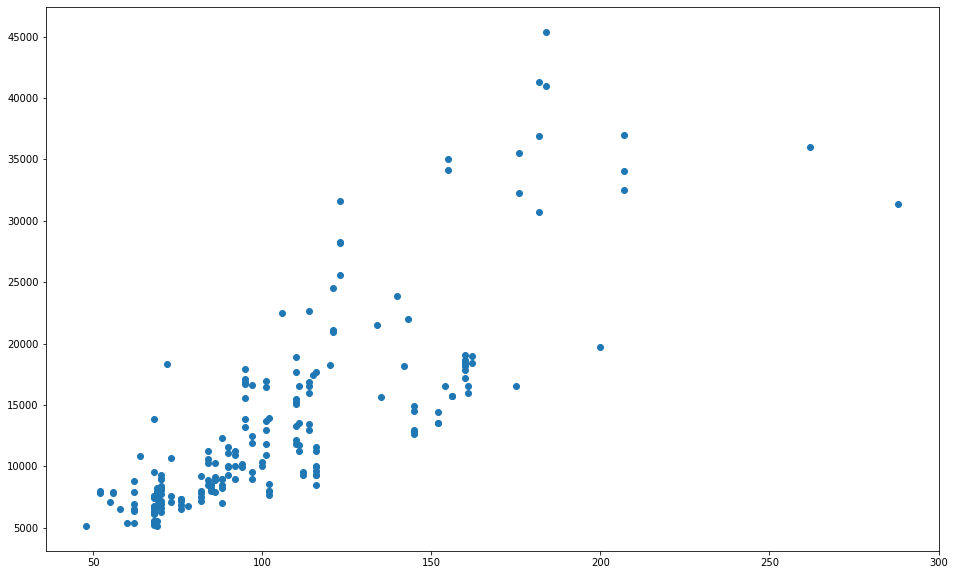

In [18]:
# enter code to show scatterplot
# y = price
# x2 = horsepower
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x2 = df_ph['horsepower']
y2 = df_ph['price']

plt.scatter(x2, y2)
plt.show()


As can be seen from the scatterplot there seems to be a clear correlation between the price and horsepower of the car

Creating again the training/testing sets and the model itself:

In [19]:
#add code here to split the data and the model itself:
# Convert to np array
df_arr = df_cprice_prediction.values

x2 = df_arr[0:, 21]
y2 = df_arr[0:, 25]

x_res2 = x2.reshape((-1, 1))
y_res2 = y2.reshape((-1, 1))

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_res2, y_res2, test_size=0.4, random_state=101)


In [20]:
# add code to create linear regression model
model2 = LinearRegression().fit(x_train2, y_train2)
y_pred2 = model2.predict(x_test2)

Now lets see how this performs:

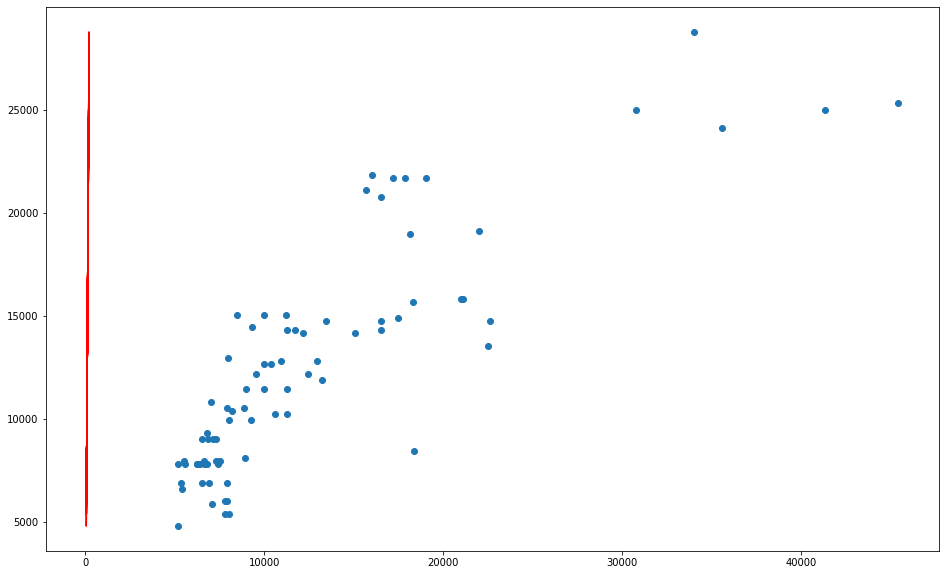

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     192.7
Date:                Tue, 17 May 2022   Prob (F-statistic):           8.60e-27
Time:                        13:51:17   Log-Likelihood:                -1219.5
No. Observations:                 123   AIC:                             2443.
Df Residuals:                     121   BIC:                             2449.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2431.9352   1257.807     -1.933      0.056   -4922.095      58.225
x1           150.8313     10.866     13.881      0.000     129.319     172.344
==============================================================================
Omnibus:                       26.832   Durbin-Watson:                   2.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.683
Skew:                           1.126   Prob(JB):                     6.57e-09
Kurtosis:                       4.511   Cond. No.                         327.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# add code to show both the scatterplot with the regression line, and the model summary results.
plt.scatter(y_test2, y_pred2)
plt.plot(x_test2, y_pred2, color='red')
plt.show()

# code to show the results of the statsmodels.api summary
x_train2 = sm.add_constant(x_train2)
my_model2 = sm.OLS(y_train2.astype(float), x_train2.astype(float)).fit()
my_model2.summary()


In [22]:
# code to show the accuracy score
model2.score(x_test2, y_test2)


0.6922804326158007

<span style='background:yellow'>\<describe the outcome as before, and now also compare the results with the results of section 2.1.></span> <br>

The accuracy of the testing data seems to be lower than the one from the engine size. <br>

What can be seen from both results is that the engine size of the car has a stronger correlation with the price, compared to the horsepower and the price. Which is interesting, since most people like a car with high horse power.

# 3. Multivariate Regression Analysis

In the previous chapter two separate bivariate regression analyses were performed to predict the price of a car based on the engine size and the horsepower separately. <br> In this chapter we are going to look if we can make an even better prediction if we try to predict the price based on BOTH of these together.

In [26]:
# First some datacleaning just to be sure.
df = pd.read_csv('data/carprice_prediction.csv')

df = df[df['horsepower'] != 0]
df = df[df['enginesize'] != 0]
df = df[df['price'] != 0]

df_phe = df[['price', 'horsepower', 'enginesize']].dropna()

print(df_phe.isna().sum())

price         0
horsepower    0
enginesize    0
dtype: int64


We begin with combining the two x's into one X:

In [27]:
# add code here to add the two x's into one
from sklearn import metrics
# convert to arrays so that we can reshape them.

array = df_phe.to_numpy()

# hp = array[:,1].reshape((-1,1))
# ens = array[:,2].reshape((-1,1))
# price = array[:,0].reshape((-1,1))
enginesizes = np.array(df_phe['enginesize']).reshape((-1,1))
horsepowers = np.array(df_phe['horsepower']).reshape((-1,1))
price = np.array(df_phe['price']).reshape((-1,1))


# Combine the 2 x's
multi_x = np.hstack((enginesizes,horsepowers)) 

multi_x_train, multi_x_test, y_train, y_test = train_test_split(multi_x, price, test_size=0.4, random_state=101)

multi_model = LinearRegression().fit(multi_x_train, y_train)
multi_y_pred = model.predict(multi_x_test)


ValueError: X has 2 features, but LinearRegression is expecting 1 features as input.

To actually perform the regression now, we can use the exact same method as before with the bivariate one:

In [28]:
# code to split the data, and create & fit the model:
multi_x_train, multi_x_test, y_train, y_test = train_test_split(multi_x, price, test_size=0.4, random_state=101)


In [29]:
# Fit the model
multi_model = LinearRegression().fit(multi_x_train, y_train)
multi_y_pred = model.predict(multi_x_test)


ValueError: X has 2 features, but LinearRegression is expecting 1 features as input.

A visualisation becomes now more difficult, since it would have to be in 3D. (0.5 bonus if you manage to do this). However, the model summary still works:

In [30]:
#code to show model summary and accuracy score
multi_x_test

array([[ 90,  68],
       [109,  85],
       [171, 156],
       [ 98, 102],
       [120,  97],
       [181, 160],
       [121, 110],
       [ 97,  69],
       [110,  86],
       [ 92,  76],
       [108, 111],
       [140, 120],
       [ 92,  68],
       [ 92,  62],
       [108, 111],
       [134,  72],
       [122,  88],
       [122,  92],
       [ 92,  76],
       [ 97,  69],
       [110, 100],
       [110, 101],
       [ 92,  62],
       [ 91,  68],
       [146, 116],
       [258, 176],
       [ 91,  68],
       [110,  56],
       [ 97,  52],
       [108,  82],
       [ 90,  68],
       [ 70, 101],
       [141, 160],
       [152, 154],
       [164, 121],
       [141, 114],
       [ 97,  69],
       [ 90,  68],
       [120,  97],
       [110,  86],
       [ 79,  60],
       [ 92,  62],
       [304, 184],
       [171, 161],
       [ 90,  68],
       [209, 182],
       [ 97,  69],
       [108,  82],
       [121, 110],
       [141, 114],
       [ 61,  48],
       [122,  84],
       [ 92,

Instead of looking at the R-square, we should be looking at the adjusted R-square. <span style='background:yellow'>< explain why></span>.

We also see more rows now in the 'coef' column. <span style='background:yellow'>\<explain why this is></span>.

<span style='background:yellow'>\<explain how this model performs compared to the other two from chapter 2/></span>

A last thing to do would be to check the VIF's:

In [ ]:
#add code here to see the VIF's
from statsmodels.stats.outliers_influence import variance_inflation_factor

# [variance_inflation_factor(newX, j) for j in range(newX.shape[1])]

<span style='background:yellow'>\<explain what to look for in the results></span>

<font size="5"><center>-----Chapters 1 to 3 are required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However the template is not as extensive as the previous chapters. <br>
    You can select any chapter below the order is not fixed (you can leave the others empty)<br>
    You don't have to use the same dataset for the chapters below. If it helps in clarification you can use another dataset, but then make sure to include it as you submit.
    ----</center></font>

# 4. Selecting Input Variables

In chapter 3 we improved on the model to predict <span style='background:yellow'>\<your y-variable name></span> by using two input variables. We can actually add as many input variables as we like. Lets explore this by simply first adding ALL other variables as X.

In [ ]:
#add code to create an X variable using all variables, except of course your y variable:


We could first have a quick look at the results of this model:

In [ ]:
#add code here to model and fit the new X with the y, and show the model summary and accuracy score:


However we have to be careful with those VIF's. So lets see:

In [ ]:
#add code here to show the VIF's.

We need to remove the ones with a VIF higher than 10, but each time we remove one, the VIF's change. Lets create a small Python function that removes the highest VIF each time, until none of them are anymore above 10.

In [ ]:
#add your function code here.


Lets run the function, and then use the result to create a new model:

In [ ]:
#add code here that runs the just made function, and uses the result for the new model:


We might also keep an eye out on that adjusted R-square. Iterate over all possible combinations of input variables we have remaining, and see which combination yields the highest adjusted R-square.

In [ ]:
#add your code here.


Finally lets see how this new model performs:

In [ ]:
#add code here to model and fit the new X with the y, and show the model summary and accuracy score:


<span style='background:yellow'>\<interpret the result, how well is the model now compared to our previous models?></span>

# 5. Another splitting method

To obtain the the test and training data we used the so-called hold-out method. However other methods also exist for this. In this chapter an explanation **and practical example** is given for the \<your splitting method>.

<span style='background:yellow'>\<explain THOROUGHLY the method. How does it work in principal, how is it different from the hold-out method?. You will need more cells than the ones below!></span>

In [ ]:
#code using your method


<span style='background:yellow'>\<explain the result></span>

# 6. A New Technique

So far, we only used the 'basic' simple linear regression (the bivariate) and multiple linear regression. However, there are many variations, as also seen on the slides. In this chapter the \<your regression method> is explained.

<span style='background:yellow'>\<explain THOROUGHLY the method. How does it work, what makes it different from the regular linear regression, in which situations might this be optimal. You will need more cells than the ones below></span>

In [ ]:
#code using your method


# 7. Surprise

There is a lot written about regression analysis, and although a lot was discussed during the lecture, that was just a tip of an iceberg. One thing for example that was not mentioned is \<start explaining from here....>

----this chapter is for the 10. It should be something substantial, related to regression and not already discussed----

---examples could be an explanation on the Gradient Descent approach to linear programming, or using Matrix Algebra to obtain the linear regression equation----